In [1]:
import alpdesign as alp
from alpdesign.seq import *
from alpdesign.mlp import *
from alpdesign.utils import *
import jax 
from jax_unirep import get_reps
import haiku as hk

In [2]:
def hamming(seq1, seq2): # seq1 and seq2 are of same length
    seqlist1 = list(seq1)
    seqlist2 = list(seq2)
    hamming_distance = 0.
    for i in range(len(seqlist1)):
        if seqlist1[i] == seqlist2[i]:
            continue
        hamming_distance += 1.
    return hamming_distance / len(seqlist1)
    

In [11]:
target_seq = 'GIGAVLKVLTTGLPALISWIKRKRQQ'

seqs = ['GIGAVLKVLKAGLPALIVTLKRKIVQ',
       'PPGATLKKHTTGSVALISWIWARIQQ',
       'GIGAVLKVLTTGLKTLISAAKRKRAA',
       'HAPPVLKVLTTGLAPPLVWIKRKRTH',
       'GIGAVLUIHKLSSVAAWRPPKRKRQQ']

labels = []
for seq in seqs:
    labels.append(hamming(target_seq, seq))
labels = jnp.array(labels)
    
reps = get_reps(seqs)[0]

a = [(reps[i], labels[i]) for i in range(len(labels))]
print(a)

[(array([ 0.0238702 , -0.00616227,  0.0095366 , ...,  0.08495536,
        0.08562474,  0.03083043], dtype=float32), DeviceArray(0.26923078, dtype=float32)), (array([ 0.02506429, -0.02240591, -0.00289605, ...,  0.05114787,
        0.06108336,  0.05683552], dtype=float32), DeviceArray(0.42307693, dtype=float32)), (array([ 0.02197636, -0.00225755, -0.00368318, ...,  0.07269727,
        0.10216378,  0.03837078], dtype=float32), DeviceArray(0.23076923, dtype=float32)), (array([ 0.02619623, -0.0210589 , -0.01065773, ...,  0.11094239,
        0.10616548, -0.01266241], dtype=float32), DeviceArray(0.42307693, dtype=float32)), (array([ 0.06297017, -0.04118062,  0.03020297, ...,  0.09101398,
        0.13529688,  0.09148498], dtype=float32), DeviceArray(0.5, dtype=float32))]


In [4]:
key = jax.random.PRNGKey(0)
forward = hk.without_apply_rng(hk.transform(alp.model_forward))
params, losses = alp.ensemble_train(key, forward, reps, labels)
init_x = jax.random.normal(key, shape=(1, 1900))
final_vec = alp.bayes_opt(forward, params, init_x, labels)

ValueError: All input arrays must have the same shape.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.plot(losses)

In [7]:
batch_size = 8
bag_num = 2
oh_vec = encode_seq(list(target_seq))
logits = jax.random.normal(key, shape=(jnp.shape(oh_vec)))
b_logits = jax.random.normal(key, shape=(batch_size,*jnp.shape(oh_vec)))

params = forward_seqprop.init(key, logits)
#forward_seqprop = hk.transform(forward_seqprop)
loss_traces, loss, _seqs = pso_train(key, final_vec, b_logits, params, alp.seq.train_seqprop, batch_size, bag_num)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104


In [8]:
gen_seqs = []
for seq in _seqs:
    str = ""
    gen_seqs.append(str.join(seq)) 

In [9]:
print(gen_seqs)

['IWWYIIIKRKHKFKPKWGPCGPWCCV', 'IWYYIIIKNKRKVNFRWNPCGPWCFP', 'IWYHIIIKRKRKWNVRYNPWGPWCCP', 'RIKWPVIYIDEPCTPPEPVYICVCCC', 'WKYKIKIRCHIKCRDFIYIWGRPSFW', 'PYKIPIIYIDEKCPNPEEVCICVCCC', 'IWYYIIIKRNHKFKVKHNPCGPWGCV', 'WYYVRWIYVDDICWRPKEPHCCPCCC']


In [10]:
seqs = [*seqs, *gen_seqs]

In [12]:
labels = []
for seq in seqs:
    labels.append(hamming(target_seq, seq))
labels = jnp.array(labels)

ValueError: All input arrays must have the same shape.

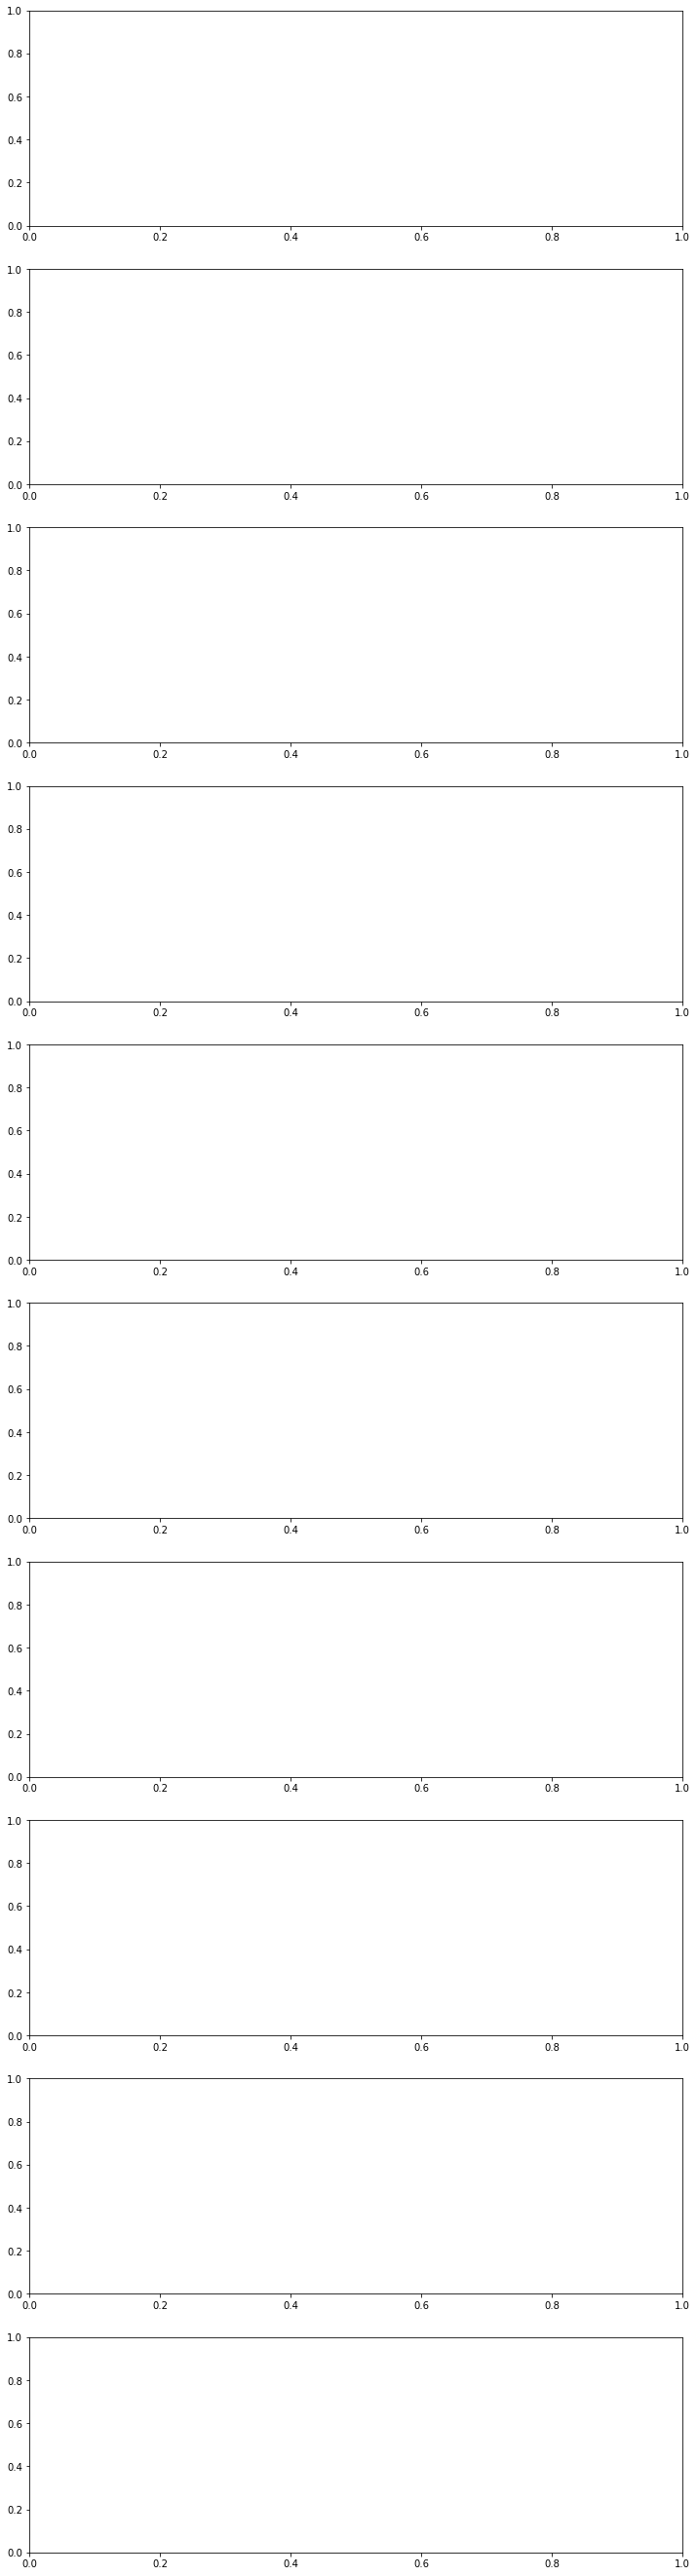

In [5]:
key = jax.random.PRNGKey(0)
batch_size = 8
bag_num = 2
target_seq = 'GIGAVLKVLTTGLPALISWIKRKRQQ'
oh_vec = encode_seq(list(target_seq))
seqs = ['GIGAVLKVLKAGLPALIVTLKRKIVQ',
       'PPGATLKKHTTGSVALISWIWARIQQ',
       'GIGAVLKVLTTGLKTLISAAKRKRAA',
       'HAPPVLKVLTTGLAPPLVWIKRKRTH',
       'GIGAVLUIHKLSSVAAWRPPKRKRQQ']


plt.rcParams["figure.figsize"] = (12,48)
fig, axs = plt.subplots(10)



for i in range(10):
    # get labels
    labels = []
    for seq in seqs:
        labels.append(hamming(target_seq, seq))
    labels = jnp.array(labels)
    reps = get_reps(seqs)[0]
    key, _ = jax.random.split(key, num=2)
    forward = hk.without_apply_rng(hk.transform(alp.model_forward))
    params, mlp_loss = alp.ensemble_train(key, forward, reps, labels)
    axs[i].plot(mlp_loss)
    final_vec = alp.bayes_opt(forward, params, init_x, labels)[0]
    
    # need to adjust length in the future
    logits = jax.random.normal(key, shape=(jnp.shape(oh_vec)))
    b_logits = jax.random.normal(key, shape=(batch_size,*jnp.shape(oh_vec)))
    params = forward_seqprop.init(key, logits)
    loss_traces, loss, _seqs = pso_train(key, final_vec, b_logits, params, alp.seq.train_seqprop, batch_size, bag_num)
    gen_seqs = []
    for seq in _seqs:
        str = ""
        gen_seqs.append(str.join(seq))
    # add data points
    seqs = [*seqs, *gen_seqs]
